In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import evident

plt.style.use("./paper.mplstyle")

In [2]:
rng = np.random.default_rng(42)

n = 10000

null_vals = rng.normal(0, 1, size=n)
alt_vals = rng.normal(3, 1, size=n)

In [3]:
crit_vals = np.quantile(null_vals, [0.025, 0.975])
crit_vals

array([-1.97272869,  1.96925742])

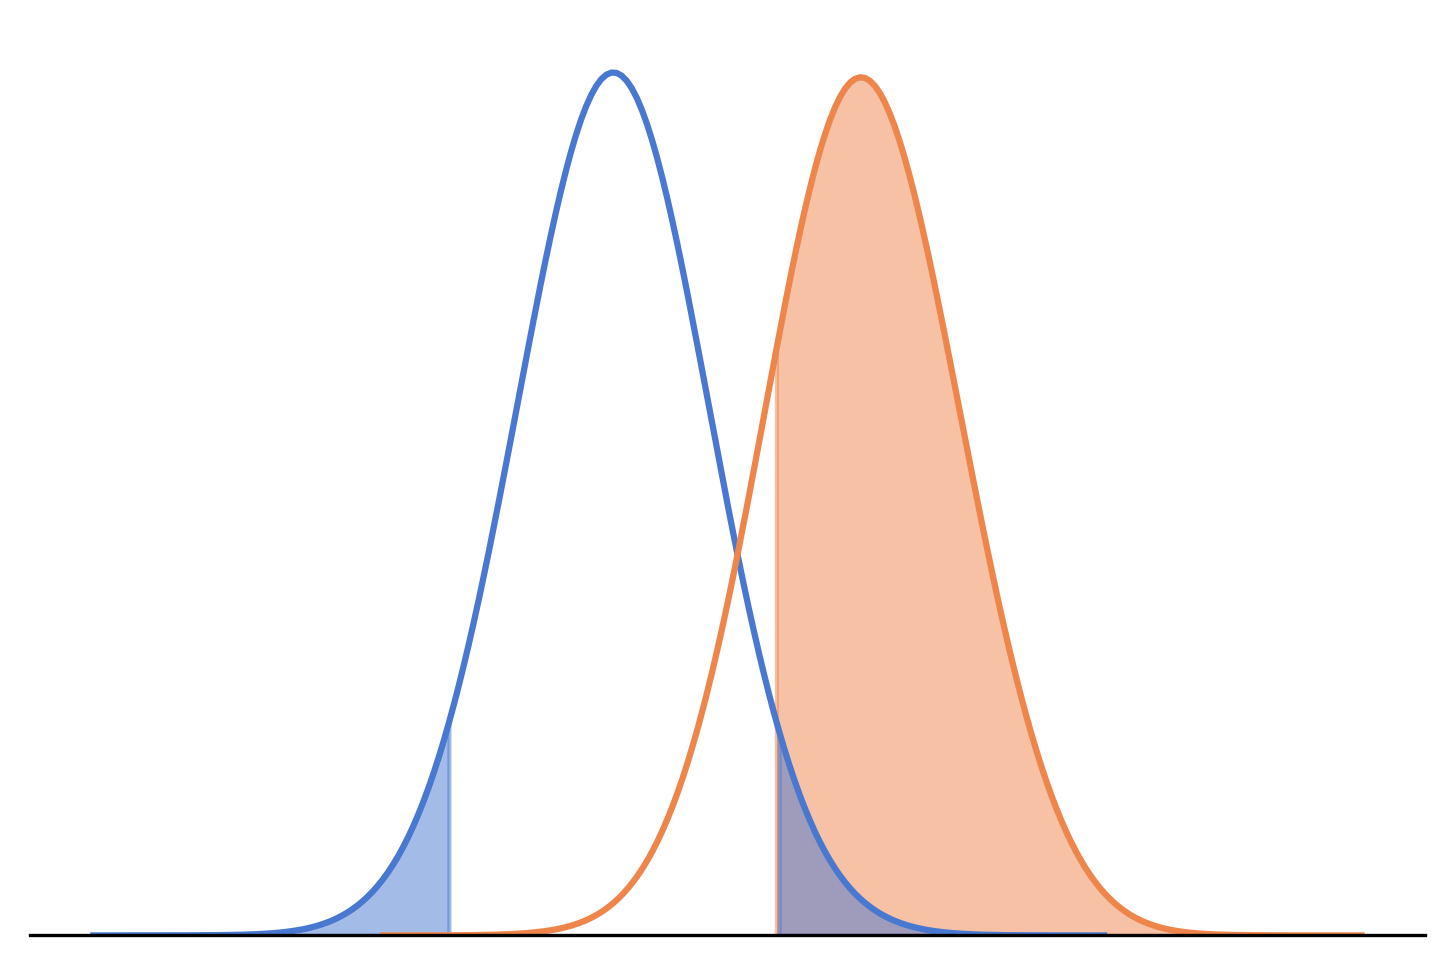

In [7]:
fig, ax = plt.subplots(1, 1)

palette = sns.color_palette("muted", 2)

kde_args = {"bw_adjust": 4, "ax": ax}
null_kde = sns.kdeplot(null_vals, color=palette[0], **kde_args)

null_line = null_kde.lines[0]
null_x = null_line.get_xdata()
null_y = null_line.get_ydata()

fill_args = {"x": null_x, "y1": null_y, "alpha": 0.5}
ax.fill_between(**fill_args, where=null_x < crit_vals[0], color=palette[0])
ax.fill_between(**fill_args, where=null_x > crit_vals[-1], color=palette[0])

alt_kde = sns.kdeplot(alt_vals, color=palette[1], **kde_args)

alt_line = alt_kde.lines[1]
alt_x = alt_line.get_xdata()
alt_y = alt_line.get_ydata()
ax.fill_between(alt_x, alt_y, where=alt_x > crit_vals[-1], color=palette[1], zorder=-1,
                alpha=0.5, lw=1)

ax.spines["left"].set_visible(False)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)

plt.savefig("../figures/workflow/distributions.pdf")

plt.show()

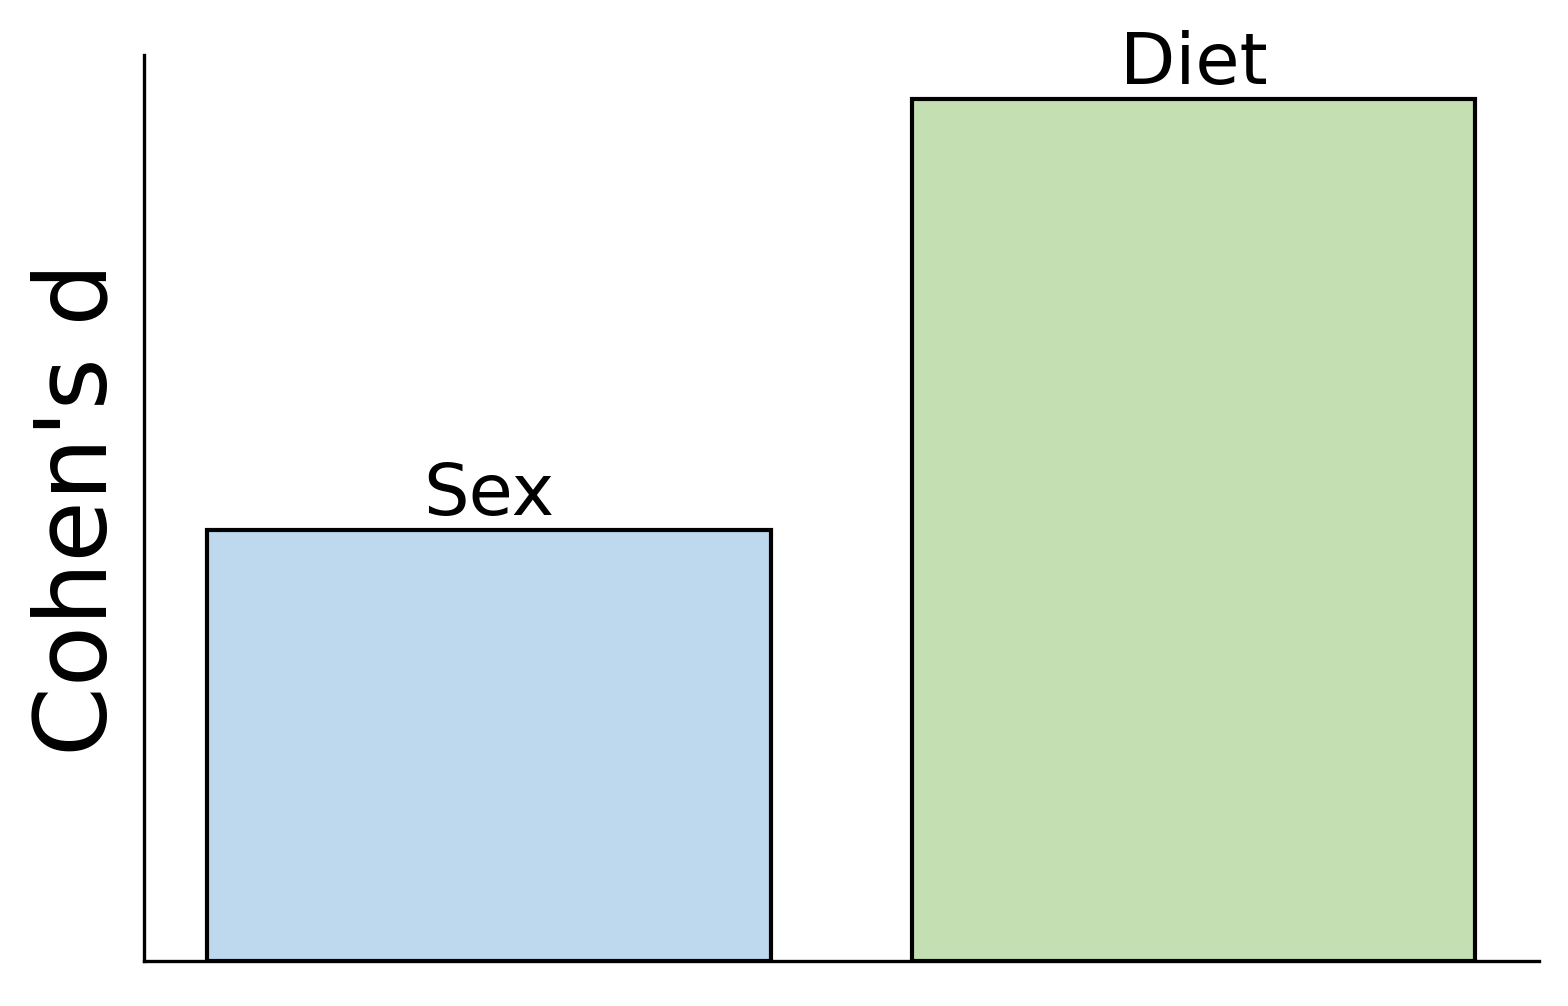

In [8]:
fig, ax = plt.subplots(1, 1)

x = 0.3
y = 0.6

ax.bar(
    [0, 1],
    [x, y],
    color=["#bed8ee", "#c4e0b3"],
    edgecolor="black"
)

ax.set_xticks([0, 1])
ax.set_yticks([])
ax.set_xticklabels([])
ax.tick_params("x", width=0)
ax.set_ylabel("Cohen's d", fontsize=24)

text_args = {"va": "bottom", "ha": "center", "fontsize": "xx-large"}
ax.text(
    x=0,
    y=x,
    s="Sex",
    **text_args
)

ax.text(
    x=1,
    y=y,
    s="Diet",
    **text_args
)

plt.savefig("../figures/workflow/effect_sizes.pdf")

plt.show()

In [14]:
from pkg_resources import resource_filename

test_md_file = resource_filename("evident", "tests/data/metadata.tsv")
test_md = pd.read_table(test_md_file, sep="\t", index_col=0)
test_md.head()

,bmi,body_habitat,body_product,body_site,calprotectin,cd_behavior,cd_location,cd_resection,collection_timestamp,description,...,sample_type,scientific_name,sex,study,study_id,timepoint,uc_extent,year_diagnosed,faith_pd,classification
1629.SubjectIBD001,25,UBERON:feces,UBERON:feces,UBERON:feces,63.0,"Non-stricturing, non-penetrating (B1)",Colonic (L2),no,06/17/2010,SubjectIBD001,...,stool,human gut metagenome,male,IBD,1629,2,not applicable,1988,9.798095,B1
1629.SubjectIBD002,25,UBERON:feces,UBERON:feces,UBERON:feces,212.0,"Non-stricturing, non-penetrating (B1)",Colonic (L2),no,09/16/2010,SubjectIBD002,...,stool,human gut metagenome,male,IBD,1629,3,not applicable,1988,12.967986,B1
1629.SubjectIBD003,25,UBERON:feces,UBERON:feces,UBERON:feces,258.0,"Non-stricturing, non-penetrating (B1)",Colonic (L2),no,01/04/2011,SubjectIBD003,...,stool,human gut metagenome,male,IBD,1629,4,not applicable,1988,18.984788,B1
1629.SubjectIBD004,25,UBERON:feces,UBERON:feces,UBERON:feces,499.0,"Non-stricturing, non-penetrating (B1)",Colonic (L2),no,04/07/2011,SubjectIBD004,...,stool,human gut metagenome,male,IBD,1629,5,not applicable,1988,12.328921,B1
1629.SubjectIBD005,25,UBERON:feces,UBERON:feces,UBERON:feces,104.0,"Non-stricturing, non-penetrating (B1)",Colonic (L2),no,06/28/2011,SubjectIBD005,...,stool,human gut metagenome,male,IBD,1629,6,not applicable,1988,11.603600,B1


In [15]:
adh = evident.AlphaDiversityHandler(test_md["faith_pd"], test_md)
alpha = [0.0001, 0.001, 0.01, 0.1]
results = adh.power_analysis("classification", alpha=alpha, total_observations=range(10, 151, 10))
results = results.to_dataframe()

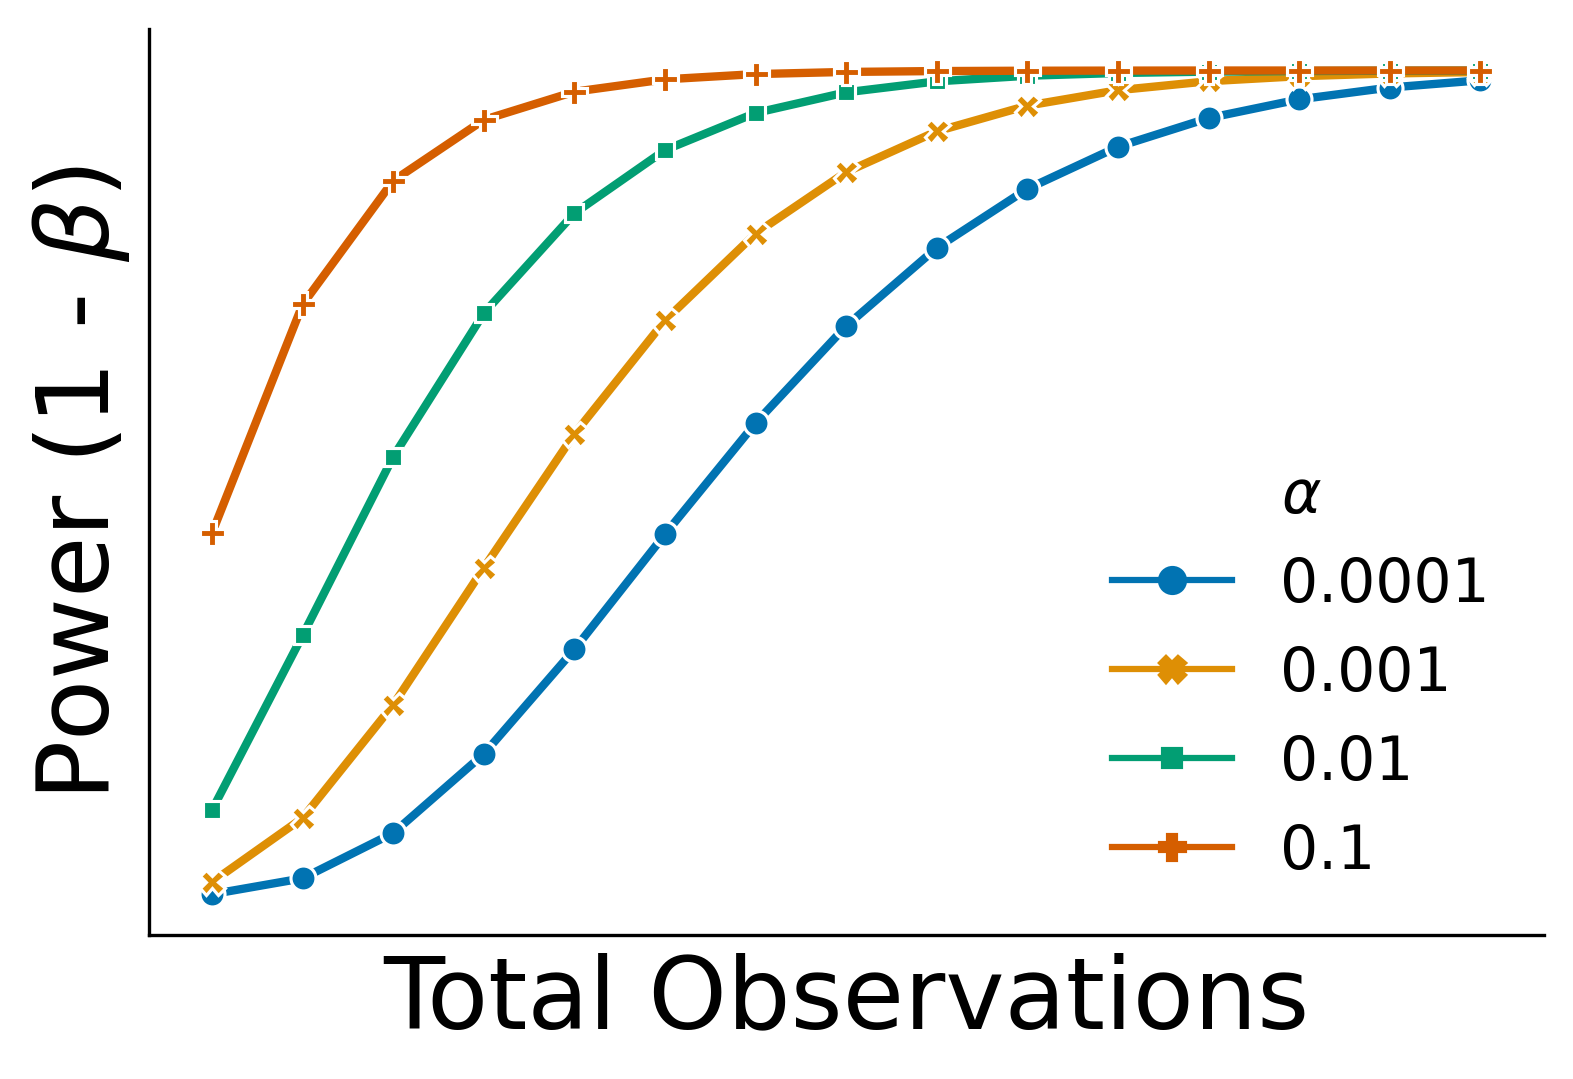

In [16]:
fig, ax = plt.subplots(1, 1)

palette = dict(zip(alpha, sns.color_palette("colorblind", len(alpha))))

g = sns.lineplot(
    data=results,
    x="total_observations",
    y="power",
    hue="alpha",
    style="alpha",
    dashes=False,
    palette=palette,
    markers=True,
    lw=2,
    ax=ax
)

ax.set_ylabel(r"Power (1 - $\beta$)", fontsize=24)
ax.set_yticks([])
ax.set_xlabel("Total Observations", fontsize=24)
ax.set_xticks([])
ax.tick_params("both", width=0)

ax.legend(frameon=False, title=r"$\alpha$", fontsize="x-large", title_fontsize="x-large")

plt.savefig("../figures/workflow/curves.pdf")

plt.show()